## CUSTOMER SHOPPING DATA

# INTRODUCTION

I analyse the distriution of a population by performing an EDA analysis on the dataset obtained from Kaggle. The aim of the analysis is to obtain the market share of the malls located across the locality and their target audience.
Customer details have also been collected for analysis so as to identify the age group that should be highly targeted during advertisements. In the analysis the mode of payment mostly preffered by the target customers was also identified, this data would be used to equip the malls with the necessary equipments to handle the payment methods.
The analysis also aims at identifying the most popular categories for the sample population taken so as to provide information about the likes and needs of the population in terms of market distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('customer_shopping_data.csv', delimiter=',', index_col=0)
data.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
invoice_no,,,,,,,,,
I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, I138884 to I232867
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99457 non-null  int64  
 3   category        99457 non-null  object 
 4   quantity        99457 non-null  int64  
 5   price           99457 non-null  float64
 6   payment_method  99457 non-null  object 
 7   invoice_date    99457 non-null  object 
 8   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [4]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format="%d/%m/%Y")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, I138884 to I232867
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     99457 non-null  object        
 1   gender          99457 non-null  object        
 2   age             99457 non-null  int64         
 3   category        99457 non-null  object        
 4   quantity        99457 non-null  int64         
 5   price           99457 non-null  float64       
 6   payment_method  99457 non-null  object        
 7   invoice_date    99457 non-null  datetime64[ns]
 8   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.6+ MB


In [6]:
data.gender.value_counts(normalize=True)

Female    0.598068
Male      0.401932
Name: gender, dtype: float64

Text(0.5, 1.0, 'Category Popularity')

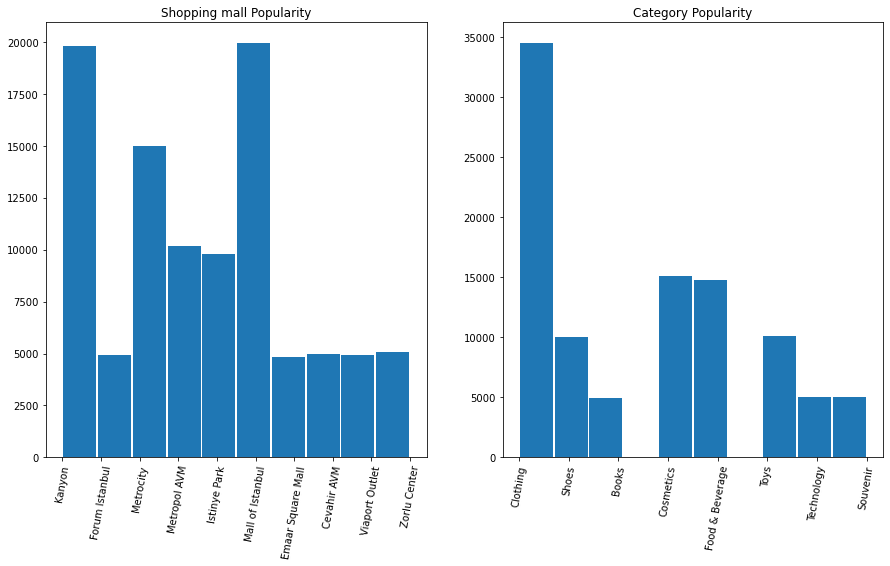

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize= (15,8))
ax1.hist('shopping_mall',data=data,rwidth=0.95)

for tick in ax1.get_xticklabels():
    tick.set_rotation(80)
ax1.set_title('Shopping mall Popularity')
ax2.hist('category', data=data,rwidth=0.95)
for tick in ax2.get_xticklabels():
    tick.set_rotation(80)
ax2.set_title('Category Popularity')

According to the dataset used, Females go for shopping generally more than the males. Approximately 59.8% of the total buyers are females compared to 40.1% being males.
Identifing the major shopping categories under analysis became a factor to consider in the analysis to see whether there were categories where the male dominated.

In [8]:
data.category.value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

In [9]:
data.payment_method.value_counts(normalize=True)

Cash           0.446897
Credit Card    0.351217
Debit Card     0.201886
Name: payment_method, dtype: float64

In [10]:
data.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
invoice_no,,,,,,,,,
I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [48]:
minimum = data.age.min()
maximum = data.age.max()
minimum, maximum

(18, 69)

In [12]:
data['age_grp']=data['age'].map(lambda x: '18-30' if(x >= 18 and x<=30) else '31-42' if (x>30 and x<=42)
                                else '43-54' if (x>42 and x<=54) else '55-70' if (x>54 and x<=70) else 'over 70')
data.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-30
I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-30
I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,18-30
I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,55-70
I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,43-54


Generally the use of cash in making payments was most preferred. The use of debit cards was the least preffered. 44% of the customers to the selected malls opted for cash and 35% opted to pay with credit cards and only the remaining 20% payed using debit cards.

In [46]:
man = data[data['gender']=='Male'].age_grp.value_counts(normalize=True)
woman = data[data['gender']=='Female'].age_grp.value_counts(normalize=True)
print('Popularity of Female agegroups in shopping')
print(woman)
print('Popularity of male agegroups in shopping')
print(man)

Popularity of Female agegroups in shopping
55-70    0.286171
18-30    0.250681
31-42    0.232860
43-54    0.230288
Name: age_grp, dtype: float64
Popularity of male agegroups in shopping
55-70    0.285378
18-30    0.252983
43-54    0.231520
31-42    0.230119
Name: age_grp, dtype: float64


Majority of the females and males that went for shopping at the desigated malls were in the age group of 55 years to 70 years and the least age group was between 31 years and 42 years for the males and between 43 years and 54 years for the females. The people in the age group 18 years to 30 years more males were identified to go for shopping in the designated malls unlike females.

# Clothing Analysis

Clothing is the most common purchased item category from the malls. Kanyon and Instabul mall are the most common malls Where trades were performed.

In [49]:
Clothing_dataset = data[data['category']=='Clothing'].sort_values(by='shopping_mall')

In [50]:
Clothing_dataset.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I229412,C491562,Male,56,Clothing,2,600.16,Credit Card,2021-06-25,Cevahir AVM,55-70
I701524,C109312,Female,31,Clothing,3,900.24,Credit Card,2021-12-01,Cevahir AVM,31-42
I293043,C316525,Female,62,Clothing,3,900.24,Credit Card,2022-02-01,Cevahir AVM,55-70
I189710,C106099,Female,20,Clothing,4,1200.32,Debit Card,2022-10-21,Cevahir AVM,18-30
I189690,C115146,Male,18,Clothing,4,1200.32,Debit Card,2022-04-14,Cevahir AVM,18-30


In [51]:
Clothing_dataset.describe()

,age,quantity,price
count,34487.000000,34487.000000,34487.000000
mean,43.409227,3.002813,901.084021
std,14.998012,1.413708,424.225594
min,18.000000,1.000000,300.080000
25%,30.000000,2.000000,600.160000
50%,43.000000,3.000000,900.240000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,1500.400000


In [18]:
Clothing_dataset.gender.value_counts(normalize=True)

Female    0.598834
Male      0.401166
Name: gender, dtype: float64

Text(0.5, 1.0, 'Popularity of the age groups in the clothing dataset')

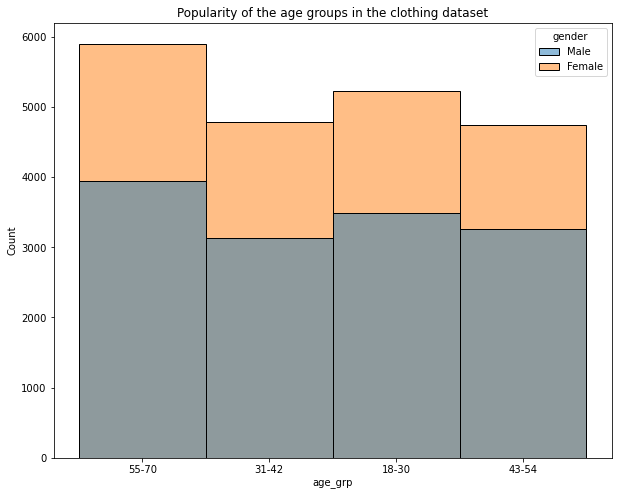

In [74]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp',data=Clothing_dataset,hue='gender')
plt.title('Popularity of the age groups in the clothing dataset')

In [75]:
Clothing_dataset[Clothing_dataset['age_grp']=='55-70'].gender.value_counts(normalize=True)

Female    0.599695
Male      0.400305
Name: gender, dtype: float64

From the bar plot above the females outnumbered the males in shopping for clothes in across all the age groups.The age group of 55-70 had more men shopping for clothes more than the other age groups. The same age group has the highest number of females also shopping for clothings.

Text(0.5, 1.0, 'Popularity of the age group"s payment methods in the clothing dataset')

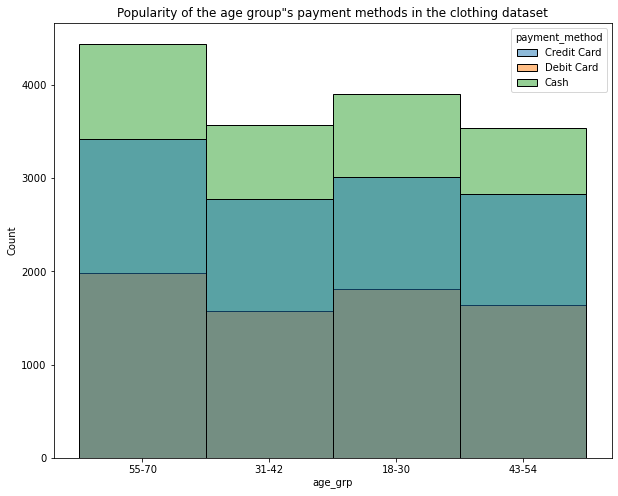

In [76]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp',data=Clothing_dataset,hue='payment_method')
plt.title('Popularity of the age group"s payment methods in the clothing dataset')

Across all the 4 age groups Cash as a payment method was more preferred compared to credit and debit card. Credit cards were the second most preferred and the least preferred was a debit cards. The largest population using credit cards was in the age  group of 55 - 70 years.

In [19]:
Female_clothing = Clothing_dataset[Clothing_dataset['gender']=='Female']
Female_clothing

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I701524,C109312,Female,31,Clothing,3,900.24,Credit Card,2021-12-01,Cevahir AVM,31-42
I293043,C316525,Female,62,Clothing,3,900.24,Credit Card,2022-02-01,Cevahir AVM,55-70
I189710,C106099,Female,20,Clothing,4,1200.32,Debit Card,2022-10-21,Cevahir AVM,18-30
I317680,C197397,Female,39,Clothing,4,1200.32,Cash,2022-02-14,Cevahir AVM,31-42
I193383,C276892,Female,48,Clothing,4,1200.32,Debit Card,2023-02-23,Cevahir AVM,43-54
...,...,...,...,...,...,...,...,...,...,...
I266538,C504358,Female,38,Clothing,2,600.16,Cash,2021-08-23,Zorlu Center,31-42
I137648,C280968,Female,42,Clothing,5,1500.40,Cash,2022-12-19,Zorlu Center,31-42
I230459,C347467,Female,33,Clothing,1,300.08,Debit Card,2022-11-01,Zorlu Center,31-42


In [20]:
Female_clothing.payment_method.value_counts(normalize=True)

Cash           0.449157
Credit Card    0.347618
Debit Card     0.203225
Name: payment_method, dtype: float64

Text(0.5, 1.0, 'Popularity of the age group"s payment methods in the clothing dataset for Females')

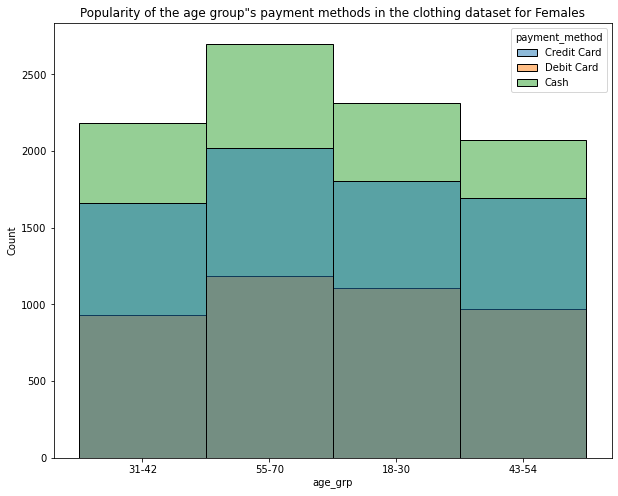

In [82]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp',data=Female_clothing,hue='payment_method')
plt.title('Popularity of the age group"s payment methods in the clothing dataset for Females')

Cash was the most preferred among the females followed closely by the the credit cards. The age group with the most entries in the number of payments among  the females was the age group 55-70 years.

In [21]:
Female_clothing.customer_id.duplicated().sum()

0

Females dominated the clothing section in average considering all the shopping malls. With most of the females making their payments in cash. The use of debit cards was the least preffered option in the market for those doing payments for clothing.

In [22]:
Female_clothing.shopping_mall.value_counts(normalize=True)

Kanyon               0.201579
Mall of Istanbul     0.199593
Metrocity            0.151704
Metropol AVM         0.102847
Istinye Park         0.099022
Forum Istanbul       0.051569
Zorlu Center         0.049632
Cevahir AVM          0.049438
Viaport Outlet       0.048567
Emaar Square Mall    0.046049
Name: shopping_mall, dtype: float64

Text(0.5, 1.0, 'Popularity of shopping malls among females for clothes')

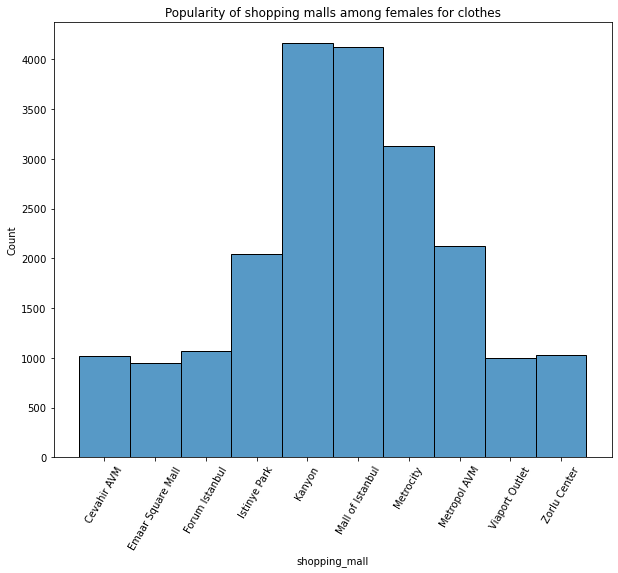

In [80]:
plt.subplots(figsize=(10,8))
sns.histplot(x='shopping_mall', data=Female_clothing)
plt.xticks(rotation=60)
plt.title('Popularity of shopping malls among females for clothes')

The top 3 preferred malls by the females were Kanyon, Mall of Instabul and Metrocity in order from the most to the least.

In [23]:
Female_clothing.price.describe()

count    20652.000000
mean       901.446016
std        423.228277
min        300.080000
25%        600.160000
50%        900.240000
75%       1200.320000
max       1500.400000
Name: price, dtype: float64

The range of prices for the female clothing was between 300 and 1500 for the females.

In [24]:
male_clothing = Clothing_dataset[Clothing_dataset.gender=='Male']
male_clothing.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I229412,C491562,Male,56,Clothing,2,600.16,Credit Card,2021-06-25,Cevahir AVM,55-70
I189690,C115146,Male,18,Clothing,4,1200.32,Debit Card,2022-04-14,Cevahir AVM,18-30
I338370,C806420,Male,57,Clothing,5,1500.40,Cash,2022-08-21,Cevahir AVM,55-70
I660302,C290341,Male,32,Clothing,3,900.24,Cash,2022-03-08,Cevahir AVM,31-42
I765914,C250256,Male,65,Clothing,1,300.08,Credit Card,2021-09-03,Cevahir AVM,55-70


In [25]:
male_clothing.payment_method.value_counts(normalize=True)

Cash           0.446693
Credit Card    0.350271
Debit Card     0.203036
Name: payment_method, dtype: float64

Text(0.5, 1.0, 'Popularity of the age group"s payment methods in the clothing dataset for males')

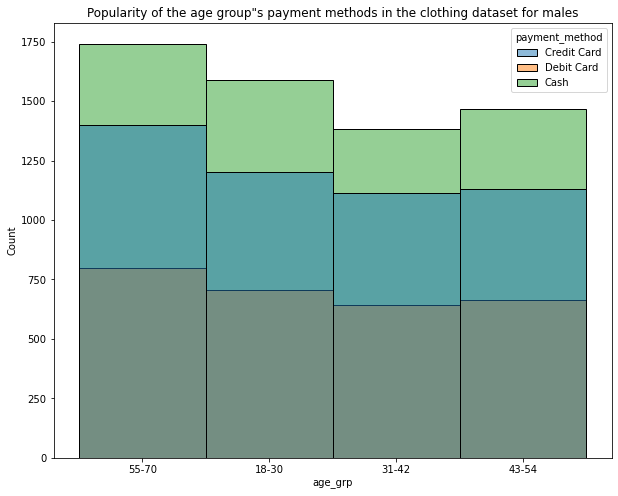

In [83]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp',data=male_clothing,hue='payment_method')
plt.title('Popularity of the age group"s payment methods in the clothing dataset for males')

For the males, The preference for the payment methods was in the same order as the females.

In [26]:
male_clothing.customer_id.duplicated().sum()

0

In [27]:
male_clothing.shopping_mall.value_counts(normalize=True)

Mall of Istanbul     0.202458
Kanyon               0.193495
Metrocity            0.154319
Metropol AVM         0.101265
Istinye Park         0.094543
Zorlu Center         0.053198
Cevahir AVM          0.051175
Viaport Outlet       0.050958
Emaar Square Mall    0.050596
Forum Istanbul       0.047994
Name: shopping_mall, dtype: float64

Text(0.5, 1.0, 'Popularity of shopping malls among males for clothes')

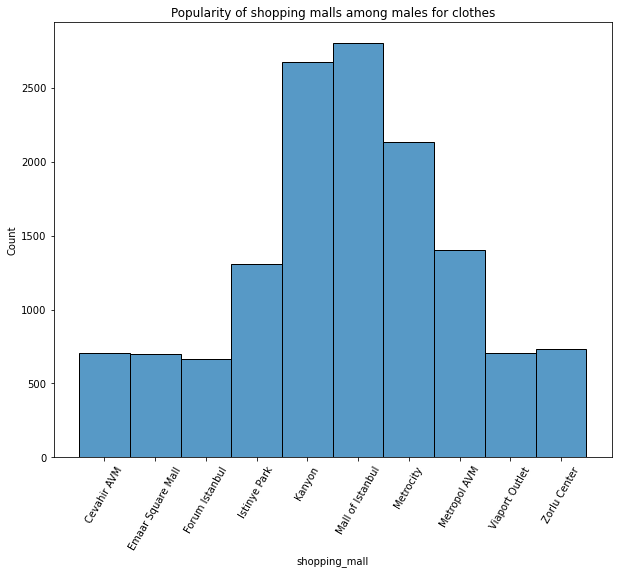

In [81]:
plt.subplots(figsize=(10,8))
sns.histplot(x='shopping_mall', data=male_clothing)
plt.xticks(rotation=60)
plt.title('Popularity of shopping malls among males for clothes')

There were no double entries of customer ids. The top 3 most preferred shopping mall for clothes purchased by men were Mall of Instabul, Kanyon and Metrocity in order. This is in order from the highest to the lowest.

# Cosmetics Analysis

Cosmetics were the secod most preferred items in the dataset

In [85]:
cosmetic_data = data[data['category']=='Cosmetics']
cosmetic_data.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,43-54
I196704,C289625,Female,25,Cosmetics,5,203.30,Credit Card,2022-04-20,Mall of Istanbul,18-30
I209744,C251229,Male,29,Cosmetics,3,121.98,Credit Card,2021-04-29,Istinye Park,18-30
I138674,C155059,Male,67,Cosmetics,2,81.32,Credit Card,2022-02-14,Metropol AVM,55-70
I752693,C306662,Female,48,Cosmetics,3,121.98,Cash,2022-04-28,Metrocity,43-54


In [86]:
cosmetic_data.describe()

,age,quantity,price
count,15097.000000,15097.000000,15097.000000
mean,43.580645,3.011525,122.448626
std,14.936556,1.413136,57.458097
min,18.000000,1.000000,40.660000
25%,31.000000,2.000000,81.320000
50%,44.000000,3.000000,121.980000
75%,56.000000,4.000000,162.640000
max,69.000000,5.000000,203.300000


Text(0.5, 1.0, 'Popularity of Cosmetics purchase among the genders')

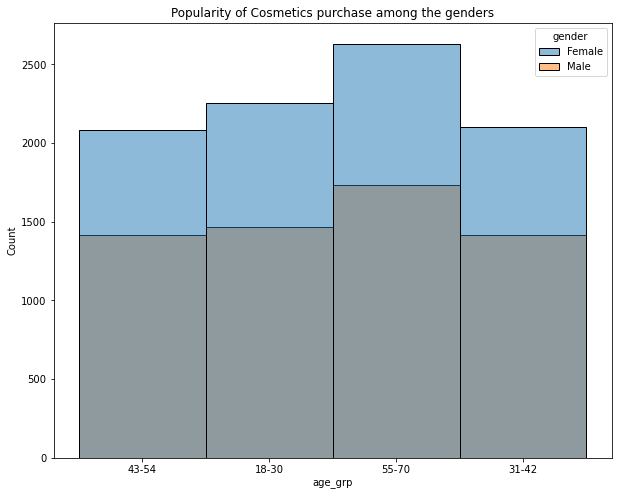

In [89]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='gender', data=cosmetic_data)
plt.title('Popularity of Cosmetics purchase among the genders')

There were more females buying the cosmetics than the males. The majority of the females registered under the age group of 55-70 years. It is also in that age group that we also had the highest number of males.

Text(0.5, 1.0, 'gender popularity for cosmetics')

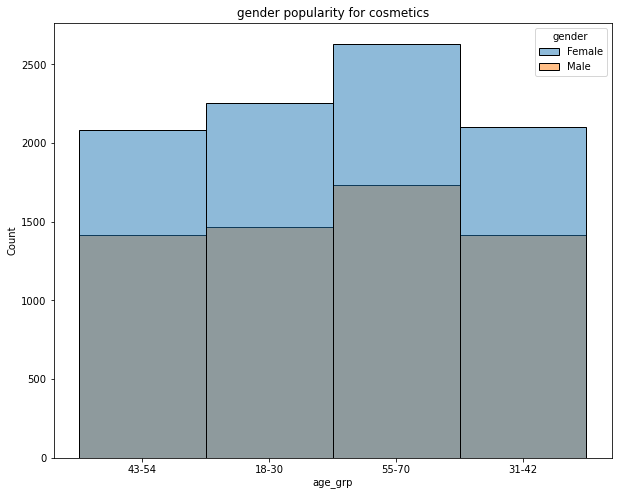

In [111]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp',hue='gender', data=cosmetic_data)
plt.title('gender popularity for cosmetics')

Most of the cosmetics shoppig was done by the females for all the age group classification done. The highes-t entry was observed in the group 55-70 years. After this age group, the group that had the nect highest entry was the 18-30 years age group.

Text(0.5, 1.0, 'Popularity of Shopping malls for each gender')

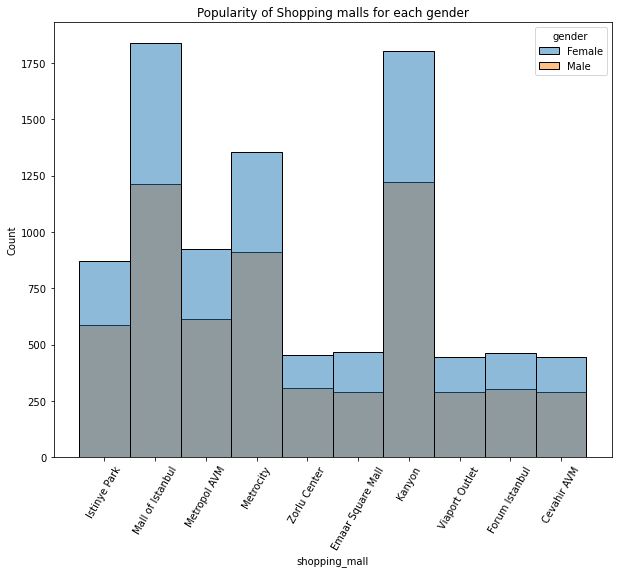

In [106]:
plt.subplots(figsize=(10,8))
sns.histplot(x='shopping_mall',hue='gender', data=cosmetic_data)
plt.xticks(rotation=60)
plt.title('Popularity of Shopping malls for each gender')

Kayon and Mall of Instabul were the most preferred malls for both genders for shopping cosmetics.

In [114]:
male_cosmetic = cosmetic_data[cosmetic_data.gender=='Male']
Female_cosmetic = cosmetic_data[cosmetic_data.gender=='Female']
male_cosmetic.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I209744,C251229,Male,29,Cosmetics,3,121.98,Credit Card,2021-04-29,Istinye Park,18-30
I138674,C155059,Male,67,Cosmetics,2,81.32,Credit Card,2022-02-14,Metropol AVM,55-70
I269690,C126436,Male,18,Cosmetics,3,121.98,Debit Card,2022-02-07,Zorlu Center,18-30
I321683,C542025,Male,60,Cosmetics,4,162.64,Credit Card,2023-01-06,Metrocity,55-70
I256691,C152549,Male,24,Cosmetics,1,40.66,Cash,2022-02-04,Metrocity,18-30


Text(0.5, 1.0, 'Popularity of the Age groups and payment methods for males')

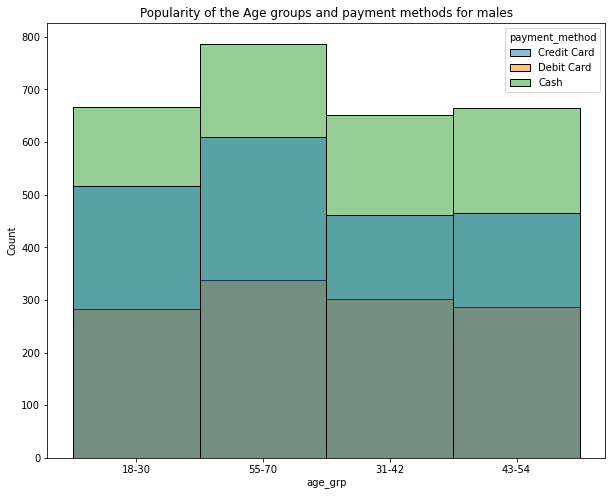

In [113]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='payment_method', data=male_cosmetic)
plt.title('Popularity of the Age groups and payment methods for males')

Text(0.5, 1.0, 'Popularity of the Age groups and payment methods for Females')

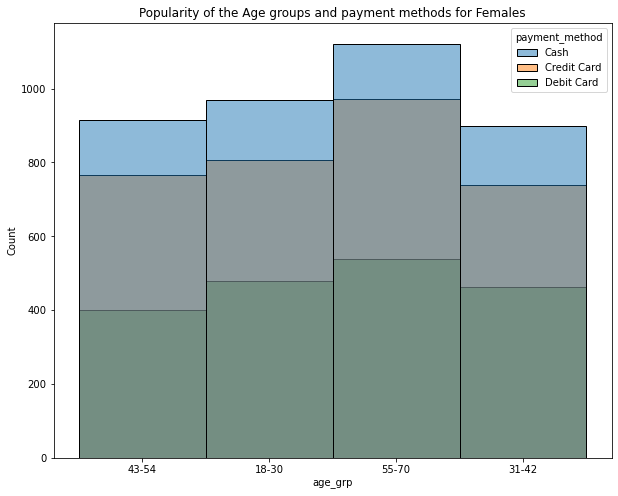

In [115]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='payment_method', data=Female_cosmetic)
plt.title('Popularity of the Age groups and payment methods for Females')

Cash took dominance among the four age groups followed by credit cards, the least preferred was debit cards. The age group with the highest number of entries was 55-70 years. Credit card etries were also highest in that age group for oth the males and females considered in the analysis.

# Food And Beverage Analysis

Food and Beverages were third in the list of the most popular categories in the dataset among the target population

In [116]:
Food_dataset = data[data.category=='Food & Beverage']
Food_dataset.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity,31-42
I195744,C330667,Female,42,Food & Beverage,3,15.69,Credit Card,2022-01-05,Zorlu Center,31-42
I412481,C125696,Female,27,Food & Beverage,1,5.23,Cash,2021-05-01,Cevahir AVM,18-30
I339732,C276887,Male,68,Food & Beverage,1,5.23,Credit Card,2023-01-04,Emaar Square Mall,55-70
I246550,C716788,Female,49,Food & Beverage,3,15.69,Cash,2021-09-10,Zorlu Center,43-54


In [117]:
Food_dataset.describe()

,age,quantity,price
count,14776.000000,14776.000000,14776.000000
mean,43.354426,2.996548,15.671948
std,14.981172,1.419154,7.422176
min,18.000000,1.000000,5.230000
25%,31.000000,2.000000,10.460000
50%,43.000000,3.000000,15.690000
75%,56.000000,4.000000,20.920000
max,69.000000,5.000000,26.150000


Text(0.5, 1.0, 'Count of Genders purchasing food and beverages')

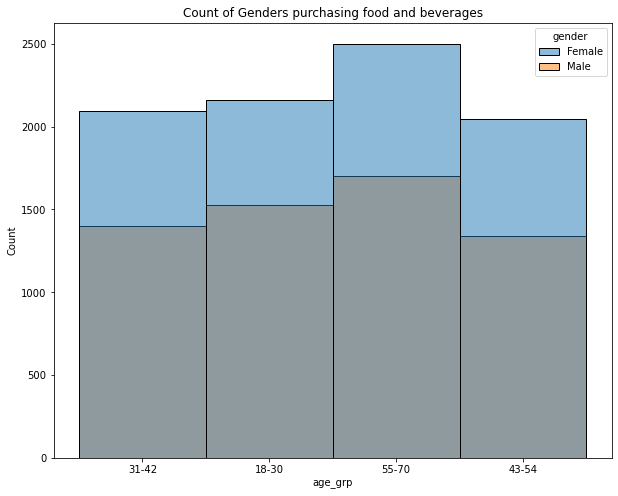

In [118]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='gender', data=Food_dataset)
plt.title('Count of Genders purchasing food and beverages')

Comments:

Text(0.5, 1.0, 'Popularity of payment methods in purchasing food and beverages')

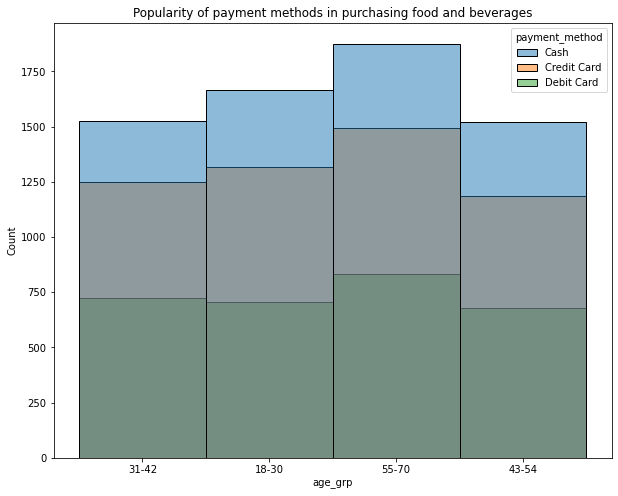

In [119]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='payment_method',data=Food_dataset)
plt.title('Popularity of payment methods in purchasing food and beverages')

Comments:

# Technology Analysis

In [122]:
Technology_dataset = data[data.category == 'Technology']
Technology_dataset.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I252275,C313348,Male,44,Technology,5,5250.0,Cash,2021-10-26,Kanyon,43-54
I160777,C626042,Female,43,Technology,4,4200.0,Cash,2022-02-22,Metrocity,43-54
I883721,C236859,Female,44,Technology,5,5250.0,Credit Card,2021-11-19,Mall of Istanbul,43-54
I289643,C584700,Female,43,Technology,2,2100.0,Cash,2022-08-22,Kanyon,43-54
I283443,C189493,Male,43,Technology,3,3150.0,Credit Card,2022-05-25,Viaport Outlet,43-54


In [123]:
Technology_dataset.describe()

,age,quantity,price
count,4996.000000,4996.000000,4996.000000
mean,43.368495,3.006605,3156.935548
std,14.835330,1.411009,1481.559805
min,18.000000,1.000000,1050.000000
25%,31.000000,2.000000,2100.000000
50%,43.000000,3.000000,3150.000000
75%,56.000000,4.000000,4200.000000
max,69.000000,5.000000,5250.000000


Text(0.5, 1.0, 'Count of Genders purchasing Technology')

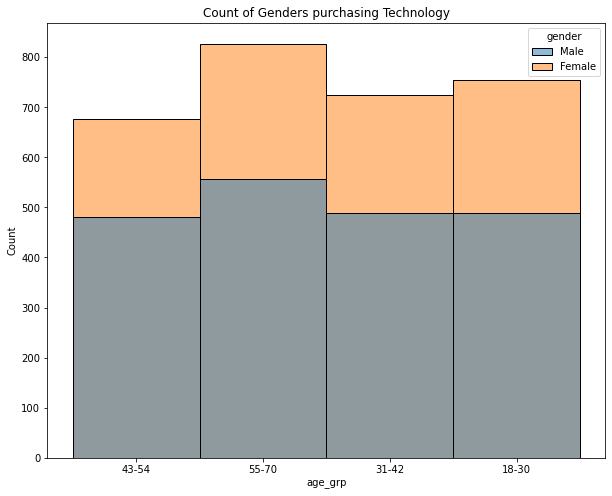

In [124]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='gender', data=Technology_dataset)
plt.title('Count of Genders purchasing Technology')

Females dominated the market at the age group 55-70 years. In this same age group there were more men than the other age groups

Text(0.5, 1.0, 'Popularity of payment methods in purchasing Technology')

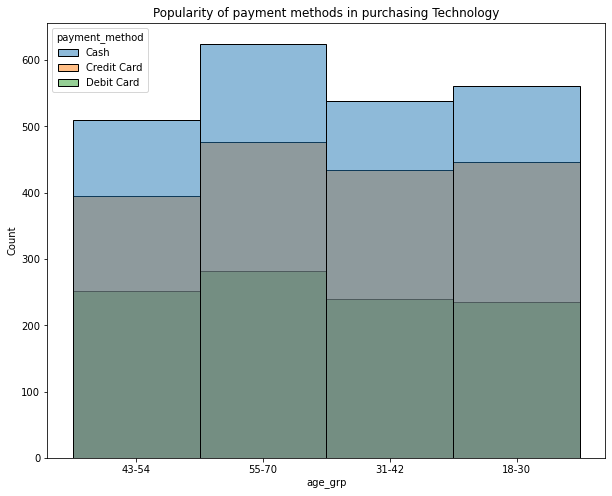

In [125]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='payment_method',data=Technology_dataset)
plt.title('Popularity of payment methods in purchasing Technology')

Cash wast the most preferred mode of payment followeed by the credit cards ad finally the debit cards. The highest entry of all the 3 modes of payments were all recorded in the age group 55-70 years.

# Shoes Analysis

In [129]:
Shoe_dataset = data[data.category == 'Shoes']
Shoe_dataset.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_grp
invoice_no,,,,,,,,,,
I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-30
I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,55-70
I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,2021-11-07,Viaport Outlet,18-30
I217053,C192344,Male,50,Shoes,4,2400.68,Cash,2022-10-10,Emaar Square Mall,43-54
I655874,C447138,Female,65,Shoes,3,1800.51,Cash,2022-08-23,Cevahir AVM,55-70


In [131]:
Shoe_dataset.describe()

,age,quantity,price
count,10034.000000,10034.000000,10034.000000
mean,43.454953,3.011461,1807.388568
std,15.003153,1.408128,845.116269
min,18.000000,1.000000,600.170000
25%,30.000000,2.000000,1200.340000
50%,44.000000,3.000000,1800.510000
75%,57.000000,4.000000,2400.680000
max,69.000000,5.000000,3000.850000


Text(0.5, 1.0, 'Count of Genders purchasing Shoes')

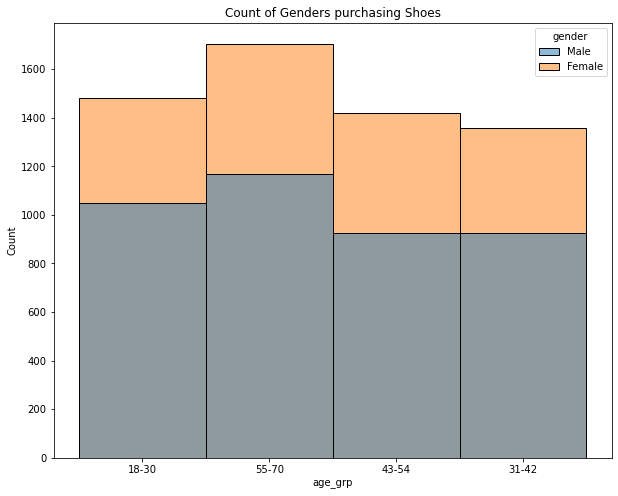

In [130]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='gender', data=Shoe_dataset)
plt.title('Count of Genders purchasing Shoes')

Females dominated the market with their highest number of purchases being in the age group 55-70 years, followed by the age group 18-30 years.

Text(0.5, 1.0, 'Popularity of payment methods in purchasing Shoes')

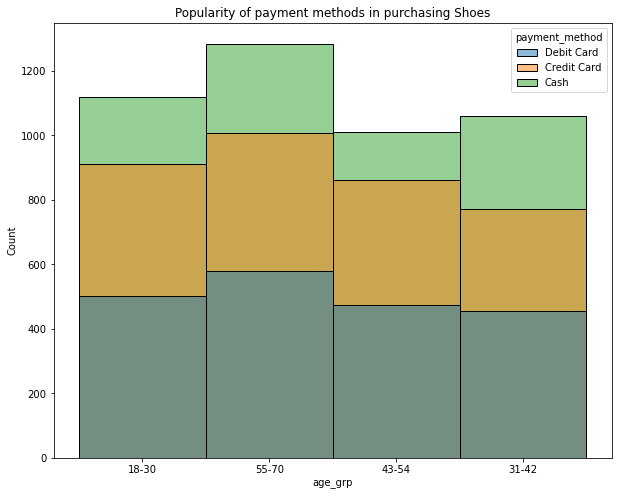

In [132]:
plt.subplots(figsize=(10,8))
sns.histplot(x='age_grp', hue='payment_method',data=Shoe_dataset)
plt.title('Popularity of payment methods in purchasing Shoes')

Cash was the most preferred mode of payment. It was highly used by the population in the age group 55-70 years. The secod most populer mode of payment was credit cards and finally the debit cards

# Conclusions

It can be conncluded that the largest population that does shopping was females across the top 5 categories of items sold in the different malls. This could be as a result of having a skewed population where the dominant population in  the target locations are females. This could be also as a result of biased data collection procedure.

Cash was the most preferred mode of payment among all the top 5 categories. Most customers preferred to use cash and credit cards in most of the purchases unlike usig debit cards. From this it can be concluded that the trget population does not prefer having debts on their backs. They are for clearig the costs instantly raher than on a later date.

Kanyon mall, Mall of Instabul and metropol mall are the top 3 most preferred malls for the customers to perform their trades. These malls could be located at very ideal locations with a ready market population. The malls could be doing well akso because of their rapport with their customers. Research shows that customers tend to shop at areas where they are well treated by the employees of the mall.

# Recommendation

A further analysis on the gender distribution is to be conducted. Identification of various items in the different categories should be considered in the future inorder to get the effect of price on the purchasing power of the population. 